In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print('전체학습데이터', len(train_data))

전체학습데이터 404290


In [4]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [5]:
train_set[0]

'What is the step by step guide to invest in share market in india?'

In [6]:
len(train_set)

808580

In [7]:
print(train_set[404290])

What is the step by step guide to invest in share market?


In [8]:
print('훈련 데이터의 총 질문수 :{}'.format(len(np.unique(train_set))))

훈련 데이터의 총 질문수 :537361


In [9]:
print('중복 질문 수: {}'.format(np.sum(train_set.value_counts() > 1 )))

중복 질문 수: 111873


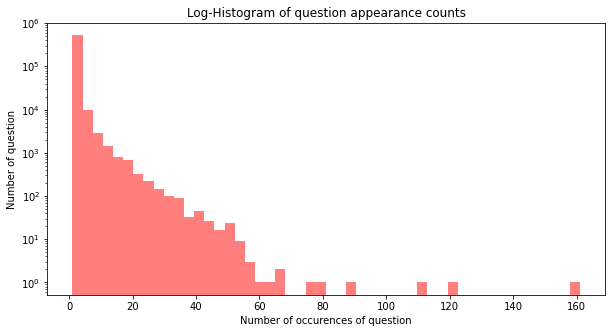

In [10]:
plt.figure(figsize = (10,5))
plt.hist(train_set.value_counts(), bins= 50, alpha = 0.5, color='r')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of question')
plt.show()

In [11]:
print('중복 최대 개수 : {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수 : {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수 : {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차 : {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간 : {}'.format(np.median(train_set.value_counts())))
print('중복 1사분위 : {}'.format(np.percentile(train_set.value_counts(), 25)))
print('중복 3사분위 : {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수 : 161
중복 최소 개수 : 1
중복 평균 개수 : 1.50
중복 표준편차 : 1.91
중복 중간 : 1.0
중복 1사분위 : 1.0
중복 3사분위 : 1.0


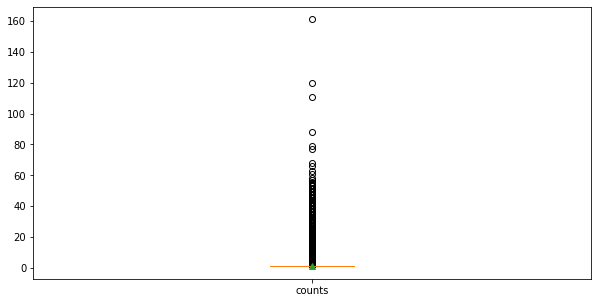

In [12]:
plt.figure(figsize=(10,5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans = True)
plt.show()

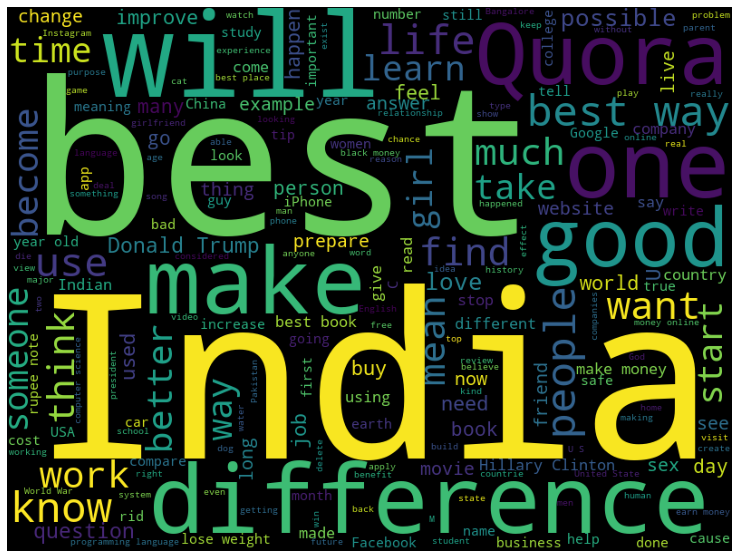

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

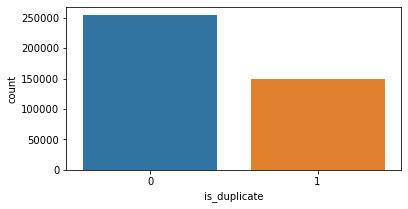

In [14]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['is_duplicate'])
plt.show()